<!-- # Machine Learning Portfolio 1

|Name|Github|Kaggle|
|----|------|------|
|Henry Lau|HenryLau08|Henry Lau|
|Mohamed Belaachir|mobelaachir|mobelaachir|
|Jayden Debi-Tewari|Jaydendt1|jaydendt123|
|Quincy Soerohardjo|quincysoerohardjo2002|Quincy Soerohardjo|

## Table of Contents
- [Data Overview](#data-overview)
- [Exploratory Data Analysis](#exploratory-data-analysis)
- [Modeling](#modeling)
    - [K-Nearest Neighbours](#k-nearest-neighbors)
    - [Logistic Regression](#logistic-regression)
    - [SVM](#svm)
    - [Decision Tree](#decision-tree)
    - [Ensembles](#ensembles)
        - [Random Forest](#random-forest)
        - [Gradient Boosted Decision Trees](#gradient-boosted-decision-trees)
        - [XGBoost](#xgboost)
    - [Self-Assembled Ensemble](#self-assembled-ensemble)
- [Results](#results)
- [Conclusion & Advice](#conclusion--advice)
- [Sources](#sources) -->

In [1]:
# !pip install plotly 

In [2]:
# Libraries
import os
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
import xgboost as xgb

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.utils.class_weight import compute_sample_weight

In [3]:
pd.set_option('display.max_columns', None)

train = pd.read_csv('train.csv', index_col='id').sort_index()
test = pd.read_csv('test.csv', index_col='id')

<!-- ## Data Overview -->

In [4]:
print('Train Data')
display(train.head(10))
print('Test Data')
display(test.head(10))

Train Data


age  hypertension  heart_disease  avg_glucose_level   bmi  gender_Female  \
id                                                                              
1   80.0             0              1              67.45  25.6           True   
7   44.0             0              0             222.75  19.6           True   
8   79.0             0              0              99.23  25.1           True   
9   44.0             0              0             125.44  35.5          False   
10  34.0             0              0              89.11  28.0           True   
20  36.0             0              0              89.79  27.3          False   
22   5.0             0              0             100.81  20.6          False   
23  68.0             0              0              75.91  21.8           True   
24  72.0             0              1             113.65  27.4           True   
29  44.0             1              0             117.10  26.9          False   

    gender_Male  gender_Other  ever_married_No  ever_married_Yes  \
id                                                                 
1         False         False            False              True   
7         False         False            False              True   
8         False         False            False              True   
9          True         False            False              True   
10        False         False            False              True   
20         True         False            False              True   
22         True         False             True             False   
23        False         False            False              True   
24        False         False            False              True   
29         True         False            False              True   

    work_type_Govt_job  work_type_Never_worked  work_type_Private  \
id                                                                  
1                False                   False              False   
7                False                   False               True   
8                False                   False               True   
9                False                   False               True   
10               False                   False               True   
20                True                   False              False   
22               False                   False              False   
23               False                   False               True   
24               False                   False              False   
29               False                   False               True   

    work_type_Self-employed  work_type_children  Residence_type_Rural  \
id                                                                      
1                      True               False                 False   
7                     False               False                 False   
8                     False               False                 False   
9                     False               False                  True   
10                    False               False                 False   
20                    False               False                 False   
22                    False                True                  True   
23                    False               False                  True   
24                     True               False                  True   
29                    False               False                  True   

    Residence_type_Urban  smoking_status_formerly smoked  \
id                                                         
1                   True                           False   
7                   True                           False   
8                   True                           False   
9                  False                           False   
10                  True                           False   
20                  True                           False   
22                 False     

Test Data


age  hypertension  heart_disease  avg_glucose_level   bmi  \
id                                                                  
32840  52.0             0              0              97.32  21.8   
45158  30.0             0              0             227.99  47.7   
56105  26.0             0              0             113.28  24.4   
3112   24.0             0              0              79.15  21.0   
35224  63.0             0              0              89.69  33.3   
33344  43.0             0              1              96.93  29.6   
35699  16.0             0              0              82.25  30.9   
48440  38.0             0              0              78.90  25.3   
32256  23.0             0              0              72.60  31.2   
18285   6.0             0              0              95.45  17.0   

       gender_Female  gender_Male  gender_Other  ever_married_No  \
id                                                                 
32840           True        False         False            False   
45158           True        False         False            False   
56105           True        False         False            False   
3112            True        False         False            False   
35224           True        False         False            False   
33344          False         True         False            False   
35699           True        False         False             True   
48440           True        False         False             True   
32256           True        False         False             True   
18285           True        False         False             True   

       ever_married_Yes  work_type_Govt_job  work_type_Never_worked  \
id                                                                    
32840              True               False                   False   
45158              True               False                   False   
56105              True               False                   False   
3112               True               False                   False   
35224              True               False                   False   
33344              True               False                   False   
35699             False               False                   False   
48440             False                True                   False   
32256             False               False                   False   
18285             False               False                   False   

       work_type_Private  work_type_Self-employed  work_type_children  \
id                                                                      
32840               True                    False               False   
45158               True                    False               False   
56105               True                    False               False   
3112                True                    False               False   
35224               True                    False               False   
33344              False                     True               False   
35699               True                    False               False   
48440              False                    False               False   
32256               True                    False               False   
18285              False                    False                True   

       Residence_type_Rural  Residence_type_Urban  \
id                                                  
32840                 False                  True   
45158                 False                  True   
56105                 False                  True   
3112                  False                  True   
35224                 False                  True   
33344                 False                  True   
35699                  True                 False   
48440                  True                 False   
32256                  True                 False   
18285                  True                 False

<!-- ## Exploratory Data Analysis -->

<!-- **Machine Learning**

De datasets moet voldoen aan de volgende eisen voor het uitvoeren machine learning:

-het moeten numerieke waardes zijn

-het moet geen missende waardes hebben



Onze data is verdeeld in numerieke waardes en booleans. 
Deze booleans kunnen worden omgezet in numerieke waardes. 
Verder zijn er geen missende waardes in de datasets.  -->


In [ ]:
display(train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 33550 entries, 1 to 72943
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             33550 non-null  float64
 1   hypertension                    33550 non-null  int64  
 2   heart_disease                   33550 non-null  int64  
 3   avg_glucose_level               33550 non-null  float64
 4   bmi                             33550 non-null  float64
 5   gender_Female                   33550 non-null  bool   
 6   gender_Male                     33550 non-null  bool   
 7   gender_Other                    33550 non-null  bool   
 8   ever_married_No                 33550 non-null  bool   
 9   ever_married_Yes                33550 non-null  bool   
 10  work_type_Govt_job              33550 non-null  bool   
 11  work_type_Never_worked          33550 non-null  bool   
 12  work_type_Private               33550

None

In [6]:
train[train.select_dtypes('bool').columns] = train[train.select_dtypes('bool').columns].astype(int)

In [7]:
display(train.info(), train.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 33550 entries, 1 to 72943
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             33550 non-null  float64
 1   hypertension                    33550 non-null  int64  
 2   heart_disease                   33550 non-null  int64  
 3   avg_glucose_level               33550 non-null  float64
 4   bmi                             33550 non-null  float64
 5   gender_Female                   33550 non-null  int32  
 6   gender_Male                     33550 non-null  int32  
 7   gender_Other                    33550 non-null  int32  
 8   ever_married_No                 33550 non-null  int32  
 9   ever_married_Yes                33550 non-null  int32  
 10  work_type_Govt_job              33550 non-null  int32  
 11  work_type_Never_worked          33550 non-null  int32  
 12  work_type_Private               33550

None

age  hypertension  heart_disease  avg_glucose_level  \
count  33550.000000  33550.000000   33550.000000       33550.000000   
mean      41.815312      0.088137       0.043040         103.587081   
std       22.477423      0.283498       0.202951          42.127396   
min        0.080000      0.000000       0.000000          55.010000   
25%       24.000000      0.000000       0.000000          77.460000   
50%       43.000000      0.000000       0.000000          91.320000   
75%       59.000000      0.000000       0.000000         111.437500   
max       82.000000      1.000000       1.000000         281.590000   

                bmi  gender_Female   gender_Male  gender_Other  \
count  33550.000000   33550.000000  33550.000000  33550.000000   
mean      28.601216       0.597079      0.402742      0.000179   
std        7.782248       0.490492      0.490457      0.013372   
min       10.100000       0.000000      0.000000      0.000000   
25%       23.300000       0.000000      0.000000      0.000000   
50%       27.700000       1.000000      0.000000      0.000000   
75%       32.800000       1.000000      1.000000      0.000000   
max       97.600000       1.000000      1.000000      1.000000   

       ever_married_No  ever_married_Yes  work_type_Govt_job  \
count     33550.000000      33550.000000        33550.000000   
mean          0.361371          0.638629            0.123875   
std           0.480405          0.480405            0.329444   
min           0.000000          0.000000            0.000000   
25%           0.000000          0.000000            0.000000   
50%           0.000000          1.000000            0.000000   
75%           1.000000          1.000000            0.000000   
max           1.000000          1.000000            1.000000   

       work_type_Never_worked  work_type_Private  work_type_Self-employed  \
count            33550.000000       33550.000000             33550.000000   
mean                 0.004203           0.574635                 0.152787   
std                  0.064693           0.494406                 0.359787   
min                  0.000000           0.000000                 0.000000   
25%                  0.000000           0.000000                 0.000000   
50%                  0.000000           1.000000                 0.000000   
75%                  0.000000           1.000000                 0.000000   
max                  1.000000           1.000000                 1.000000   

       work_type_children  Residence_type_Rural  Residence_type_Urban  \
count        33550.000000          33550.000000          33550.000000   
mean             0.144501              0.499970              0.500030   
std              0.351602              0.500007              0.500007   
min              0.000000              0.000000              0.000000   
25%              0.000000              0.000000              0.000000   
50%              0.000000              0.000000              1.000000   
75%              0.000000              1.000000              1.000000   
max              1.000000              1.000000              1.000000   

       smoking_status_formerly smoked  smoking_status_never smoked  \
count                    33550.000000                 33550.000000   
mean                         0.168733                     0.375618   
std                          0.374522                     0.484289   
min                          0.000000                     0.000000   
25%                          0.000000                     0.000000   
50%                          0.000000                     0.000000   
75%                          0.000000                     1.000000   
max                          1.000000                     1.000000   

       smoking_status_smokes        stroke  
count           33550.000000  33550.000000  
mean                0.148048      0.015410  
std                 0.355153      0.123178  
min                 0.000000      0.00000

<!-- **Kolom beschrijving**

age-----------------= leeftijd. (Ratio)

hypertension--------= Hogebloeddruk. 1:JA, 0:Nee (Nominaal)


heart_disease-------= Hartziekte. 1:JA, 0:Nee (Nominaal)


avg_glucose_level---= Gemiddelde glucosegehalte (Ratio)


bmi-----------------= Body mass index (Ratio)


Gender--------------= Male, Female, Other (Nominaal)


Married-------------= Yes, No (Nominaal)


Work type-----------= Government, never worked, self-employed, children(werken met kinderen zoals docent, kinderopvang etc) (Nominaal)


Residence type------= Rural(buiten de stad, dorpen), Urban(in de stad) (Nominaal)


Smoking status------= Formerly smoked(eerder gerookt), never smoked, smokes(actief) (Nominaal) -->

<!-- **relaties** -->

<!--  -->

In [8]:
train['hypertension'].value_counts()

hypertension
0    30593
1     2957
Name: count, dtype: int64

In [9]:
train['heart_disease'].value_counts()

heart_disease
0    32106
1     1444
Name: count, dtype: int64

In [10]:
train['gender_Female'].value_counts()

gender_Female
1    20032
0    13518
Name: count, dtype: int64

In [11]:
train['gender_Other'].value_counts()

gender_Other
0    33544
1        6
Name: count, dtype: int64

In [12]:
train['stroke'].value_counts()

stroke
0    33033
1      517
Name: count, dtype: int64

In [13]:
def fusion(dataframe, mappings):
    """
    General function to map binary columns to a single column.

    Parameters:
    df : pandas DataFrame
        The input DataFrame.
    mappings : list of dict
        Each dict contains:
        - 'cols': list of columns to fuse.
        - 'new_col': the name of the new column to be created.
        - 'map_col': dictionary mapping original columns to final values.
    """
    df = dataframe.copy()
    for mapping in mappings:
        cols = mapping['cols']
        new_col = mapping['new_col']
        map_col = mapping['map_col']
        
        # Ensure columns exist in dataframe
        if not all(col in df.columns for col in cols):
            raise ValueError(f"One or more columns from {cols} not found in DataFrame.")
        
        # Apply the fusion
        df[new_col] = df[cols].idxmax(axis=1)
        df[new_col] = df[new_col].map(map_col)
    
    return df

# List of mappings for your columns
mappings = [
    {
        'cols': ['gender_Female', 'gender_Male', 'gender_Other'],
        'new_col': 'gender',
        'map_col': {'gender_Female': 'Female', 'gender_Male': 'Male', 'gender_Other': 'Other'}
    },
    {
        'cols': ['ever_married_No', 'ever_married_Yes'],
        'new_col': 'ever_married',
        'map_col': {'ever_married_No': 'No', 'ever_married_Yes': 'Yes'}
    },
    {
        'cols': ['work_type_Govt_job', 'work_type_Never_worked','work_type_Private', 'work_type_Self-employed', 'work_type_children'],
        'new_col': 'work_type',
        'map_col': {'work_type_Govt_job': 'govt_job', 
                    'work_type_Never_worked': 'never_worked', 
                    'work_type_Private': 'private', 
                    'work_type_Self-employed': 'self-employed',
                    'work_type_children': 'children'}
    },
    {
        'cols': ['Residence_type_Rural', 'Residence_type_Urban'],
        'new_col': 'residence_type',
        'map_col': {'Residence_type_Rural': 'Rural', 'Residence_type_Urban': 'Urban'}
    },
    {
        'cols': ['smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes'],
        'new_col': 'smoking_status',
        'map_col': {'smoking_status_formerly smoked': 'formerly smoked',
                    'smoking_status_never smoked': 'never smoked',
                    'smoking_status_smokes': 'smokes'}
    }
]

In [14]:
data = fusion(train, mappings)

In [15]:
data.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'gender_Male', 'gender_Other', 'ever_married_No',
       'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'stroke', 'gender', 'ever_married',
       'work_type', 'residence_type', 'smoking_status'],
      dtype='object')

In [16]:
data = data[['age','hypertension','heart_disease','avg_glucose_level','bmi','gender','ever_married','work_type','residence_type','smoking_status','stroke']]
data.head(10)

age  hypertension  heart_disease  avg_glucose_level   bmi  gender  \
id                                                                       
1   80.0             0              1              67.45  25.6  Female   
7   44.0             0              0             222.75  19.6  Female   
8   79.0             0              0              99.23  25.1  Female   
9   44.0             0              0             125.44  35.5    Male   
10  34.0             0              0              89.11  28.0  Female   
20  36.0             0              0              89.79  27.3    Male   
22   5.0             0              0             100.81  20.6    Male   
23  68.0             0              0              75.91  21.8  Female   
24  72.0             0              1             113.65  27.4  Female   
29  44.0             1              0             117.10  26.9    Male   

   ever_married      work_type residence_type   smoking_status  stroke  
id                                                                      
1           Yes  self-employed          Urban     never smoked       0  
7           Yes        private          Urban     never smoked       0  
8           Yes        private          Urban  formerly smoked       0  
9           Yes        private          Rural     never smoked       0  
10          Yes        private          Urban     never smoked       0  
20          Yes       govt_job          Urban           smokes       0  
22           No       children          Rural  formerly smoked       0  
23          Yes        private          Rural     never smoked       0  
24          Yes  self-employed          Rural  formerly smoked       0  
29          Yes        private          Rural     never smoked       0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33550 entries, 1 to 72943
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                33550 non-null  float64
 1   hypertension       33550 non-null  int64  
 2   heart_disease      33550 non-null  int64  
 3   avg_glucose_level  33550 non-null  float64
 4   bmi                33550 non-null  float64
 5   gender             33550 non-null  object 
 6   ever_married       33550 non-null  object 
 7   work_type          33550 non-null  object 
 8   residence_type     33550 non-null  object 
 9   smoking_status     33550 non-null  object 
 10  stroke             33550 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 3.1+ MB


In [18]:
cat_col = data.select_dtypes(include='object').columns
print(cat_col)

Index(['gender', 'ever_married', 'work_type', 'residence_type',
       'smoking_status'],
      dtype='object')


In [19]:
# Verdeling van de categorische kolommen en de target 'stroke'
for col in cat_col:
    fig = px.histogram(data, x=col, color='stroke')
    fig.show()

In [20]:
# Verdeling van de categorische kolommen
for col in cat_col:
    count_series = data[col].value_counts()
    count_df = count_series.reset_index()
    count_df.columns = [col, 'count']
    
    fig = px.pie(count_df, names=col, values='count', title=f'Pie chart of {col}')
    fig.show()

In [21]:
num_col = data.select_dtypes(exclude=['object','bool']).columns.drop('stroke')

In [22]:
for col in num_col:
    fig = px.box(data, x=col, color='stroke')
    fig.show()

In [23]:
data

age  hypertension  heart_disease  avg_glucose_level   bmi  gender  \
id                                                                          
1      80.0             0              1              67.45  25.6  Female   
7      44.0             0              0             222.75  19.6  Female   
8      79.0             0              0              99.23  25.1  Female   
9      44.0             0              0             125.44  35.5    Male   
10     34.0             0              0              89.11  28.0  Female   
...     ...           ...            ...                ...   ...     ...   
72938  40.0             0              0             132.52  40.1  Female   
72939  34.0             0              0              82.72  26.3  Female   
72940   2.0             0              0             102.92  17.6  Female   
72941  68.0             0              0             149.38  27.3    Male   
72943  59.0             0              0              55.29  23.7  Female   

      ever_married      work_type residence_type   smoking_status  stroke  
id                                                                         
1              Yes  self-employed          Urban     never smoked       0  
7              Yes        private          Urban     never smoked       0  
8              Yes        private          Urban  formerly smoked       0  
9              Yes        private          Rural     never smoked       0  
10             Yes        private          Urban     never smoked       0  
...            ...            ...            ...              ...     ...  
72938          Yes        private          Rural     never smoked       0  
72939           No        private          Urban  formerly smoked       0  
72940           No       children          Urban  formerly smoked       0  
72941          Yes  self-employed          Urban  formerly smoked       0  
72943          Yes        private          Urban           smokes       0  

[33550 rows x 11 columns]

<!-- **Bevindingen** -->

<!--  -->

<!-- ## Data Opschonen -->

<!--  -->

In [24]:
# ever_married_No en ever_married_Yes in 1 kolom
train['ever_married'] = data['ever_married']
train.drop(columns=['ever_married_No','ever_married_Yes'], inplace=True)

# outliers eruit gehaald
train = train.drop(train[(train['stroke'] == 0) & (train['avg_glucose_level'] > 161.57)].index)
train = train.drop(train[(train['stroke'] == 0) & (train['bmi'] > 47.2)].index)
train = train.drop(train[(train['stroke'] == 1) & (train['bmi'] < 15.1) | (train['bmi'] > 43.8)].index)
train = train.drop(train[(train['stroke'] == 1) & (train['age'] < 33)].index)
train

age  hypertension  heart_disease  avg_glucose_level   bmi  \
id                                                                  
1      80.0             0              1              67.45  25.6   
8      79.0             0              0              99.23  25.1   
9      44.0             0              0             125.44  35.5   
10     34.0             0              0              89.11  28.0   
20     36.0             0              0              89.79  27.3   
...     ...           ...            ...                ...   ...   
72938  40.0             0              0             132.52  40.1   
72939  34.0             0              0              82.72  26.3   
72940   2.0             0              0             102.92  17.6   
72941  68.0             0              0             149.38  27.3   
72943  59.0             0              0              55.29  23.7   

       gender_Female  gender_Male  gender_Other  work_type_Govt_job  \
id                                                                    
1                  1            0             0                   0   
8                  1            0             0                   0   
9                  0            1             0                   0   
10                 1            0             0                   0   
20                 0            1             0                   1   
...              ...          ...           ...                 ...   
72938              1            0             0                   0   
72939              1            0             0                   0   
72940              1            0             0                   0   
72941              0            1             0                   0   
72943              1            0             0                   0   

       work_type_Never_worked  work_type_Private  work_type_Self-employed  \
id                                                                          
1                           0                  0                        1   
8                           0                  1                        0   
9                           0                  1                        0   
10                          0                  1                        0   
20                          0                  0                        0   
...                       ...                ...                      ...   
72938                       0                  1                        0   
72939                       0                  1                        0   
72940                       0                  0                        0   
72941                       0                  0                        1   
72943                       0                  1                        0   

       work_type_children  Residence_type_Rural  Residence_type_Urban  \
id                                                                      
1                       0                     0                     1   
8                       0                     0                     1   
9                       0                     1                     0   
10                      0                     0                     1   
20                      0                     0                     1   
...                   ...                   ...                   ...   
72938                   0                     1                     0   
72939                   0                     0                     1   
72940                   1                     0                     1   
72941                   0                     0                     1   
72943                   0                     0                     1   

       smoking_status_formerly smoked  smoking_status_never smoked  \
id                                                                   
1                                   0                            1   
8                       

In [25]:
test_data = fusion(test, mappings)
test['ever_married'] = test_data['ever_married']
test.drop(columns=['ever_married_No','ever_married_Yes'], inplace=True)
test

age  hypertension  heart_disease  avg_glucose_level   bmi  \
id                                                                  
32840  52.0             0              0              97.32  21.8   
45158  30.0             0              0             227.99  47.7   
56105  26.0             0              0             113.28  24.4   
3112   24.0             0              0              79.15  21.0   
35224  63.0             0              0              89.69  33.3   
...     ...           ...            ...                ...   ...   
60672  24.0             0              0              77.54  25.0   
25989  17.0             0              0              99.99  22.7   
34072  11.0             0              0              80.11  22.2   
32400  16.0             0              0             105.26  47.5   
53144  52.0             0              1              72.79  54.7   

       gender_Female  gender_Male  gender_Other  work_type_Govt_job  \
id                                                                    
32840           True        False         False               False   
45158           True        False         False               False   
56105           True        False         False               False   
3112            True        False         False               False   
35224           True        False         False               False   
...              ...          ...           ...                 ...   
60672           True        False         False               False   
25989           True        False         False               False   
34072           True        False         False               False   
32400           True        False         False               False   
53144           True        False         False               False   

       work_type_Never_worked  work_type_Private  work_type_Self-employed  \
id                                                                          
32840                   False               True                    False   
45158                   False               True                    False   
56105                   False               True                    False   
3112                    False               True                    False   
35224                   False               True                    False   
...                       ...                ...                      ...   
60672                   False               True                    False   
25989                   False              False                     True   
34072                   False              False                    False   
32400                   False               True                    False   
53144                   False               True                    False   

       work_type_children  Residence_type_Rural  Residence_type_Urban  \
id                                                                      
32840               False                 False                  True   
45158               False                 False                  True   
56105               False                 False                  True   
3112                False                 False                  True   
35224               False                 False                  True   
...                   ...                   ...                   ...   
60672               False                  True                 False   
25989               False                  True                 False   
34072                True                 False                  True   
32400               False                  True                 False   
53144               False                 False                  True   

       smoking_status_formerly smoked  smoking_status_never smoked  \
id                                                                   
32840                           False                        False   
45158                   

In [26]:
TRAIN = train.copy()
TEST = test.copy()

In [27]:
# Encode alle object en boolean kolommen
cols = TEST.select_dtypes(include=['object','bool']).columns
for col in cols:
    encoder = LabelEncoder()
    TRAIN[col] = encoder.fit_transform(TRAIN[col])
    TEST[col] = encoder.transform(TEST[col])
    print(f'{col} Labels:', encoder.classes_)


gender_Female Labels: [0 1]
gender_Male Labels: [0 1]
gender_Other Labels: [0 1]
work_type_Govt_job Labels: [0 1]
work_type_Never_worked Labels: [0 1]
work_type_Private Labels: [0 1]
work_type_Self-employed Labels: [0 1]
work_type_children Labels: [0 1]
Residence_type_Rural Labels: [0 1]
Residence_type_Urban Labels: [0 1]
smoking_status_formerly smoked Labels: [0 1]
smoking_status_never smoked Labels: [0 1]
smoking_status_smokes Labels: [0 1]
ever_married Labels: ['No' 'Yes']


In [28]:
# Standardiseer alle float64 kolommen
float_cols = TEST.select_dtypes('float64').columns
scaler = MinMaxScaler()
TRAIN[float_cols] = scaler.fit_transform(TRAIN[float_cols])
TEST[float_cols] = scaler.transform(TEST[float_cols])

In [ ]:
TRAIN.head(10)

age  hypertension  heart_disease  avg_glucose_level       bmi  \
id                                                                       
1   0.975586             0              1           0.057399  0.459941   
8   0.963379             0              0           0.204033  0.445104   
9   0.536133             0              0           0.324967  0.753709   
10  0.414062             0              0           0.157339  0.531157   
20  0.438477             0              0           0.160476  0.510386   
22  0.060059             0              0           0.211323  0.311573   
23  0.829102             0              0           0.096433  0.347181   
24  0.877930             0              1           0.270567  0.513353   
29  0.536133             1              0           0.286485  0.498516   
36  0.060059             0              0           0.169981  0.192878   

    gender_Female  gender_Male  gender_Other  work_type_Govt_job  \
id                                                                 
1               1            0             0                   0   
8               1            0             0                   0   
9               0            1             0                   0   
10              1            0             0                   0   
20              0            1             0                   1   
22              0            1             0                   0   
23              1            0             0                   0   
24              1            0             0                   0   
29              0            1             0                   0   
36              0            1             0                   0   

    work_type_Never_worked  work_type_Private  work_type_Self-employed  \
id                                                                       
1                        0                  0                        1   
8                        0                  1                        0   
9                        0                  1                        0   
10                       0                  1                        0   
20                       0                  0                        0   
22                       0                  0                        0   
23                       0                  1                        0   
24                       0                  0                        1   
29                       0                  1                        0   
36                       0                  0                        0   

    work_type_children  Residence_type_Rural  Residence_type_Urban  \
id                                                                   
1                    0                     0                     1   
8                    0                     0                     1   
9                    0                     1                     0   
10                   0                     0                     1   
20                   0                     0                     1   
22                   1                     1                     0   
23                   0                     1                     0   
24                   0                     1                     0   
29                   0                     1                     0   
36                   1                     1                     0   

    smoking_status_formerly smoked  smoking_status_never smoked  \
id                                                                
1                                0                            1   
8                                0                            0   
9                                0                            1   
10                               0                            1   
20                               0                            0   
22                               0                            0   
23                               0   

In [ ]:
TEST.head(10)

age  hypertension  heart_disease  avg_glucose_level       bmi  \
id                                                                          
32840  0.633789             0              0           0.195220  0.347181   
45158  0.365234             0              0           0.798136  1.115727   
56105  0.316406             0              0           0.268860  0.424332   
3112   0.291992             0              0           0.111383  0.323442   
35224  0.768066             0              0           0.160015  0.688427   
33344  0.523926             0              1           0.193420  0.578635   
35699  0.194336             0              0           0.125686  0.617211   
48440  0.462891             0              0           0.110229  0.451039   
32256  0.279785             0              0           0.081161  0.626113   
18285  0.072266             0              0           0.186592  0.204748   

       gender_Female  gender_Male  gender_Other  work_type_Govt_job  \
id                                                                    
32840              1            0             0                   0   
45158              1            0             0                   0   
56105              1            0             0                   0   
3112               1            0             0                   0   
35224              1            0             0                   0   
33344              0            1             0                   0   
35699              1            0             0                   0   
48440              1            0             0                   1   
32256              1            0             0                   0   
18285              1            0             0                   0   

       work_type_Never_worked  work_type_Private  work_type_Self-employed  \
id                                                                          
32840                       0                  1                        0   
45158                       0                  1                        0   
56105                       0                  1                        0   
3112                        0                  1                        0   
35224                       0                  1                        0   
33344                       0                  0                        1   
35699                       0                  1                        0   
48440                       0                  0                        0   
32256                       0                  1                        0   
18285                       0                  0                        0   

       work_type_children  Residence_type_Rural  Residence_type_Urban  \
id                                                                      
32840                   0                     0                     1   
45158                   0                     0                     1   
56105                   0                     0                     1   
3112                    0                     0                     1   
35224                   0                     0                     1   
33344                   0                     0                     1   
35699                   0                     1                     0   
48440                   0                     1                     0   
32256                   0                     1                     0   
18285                   1                     1                     0   

       smoking_status_formerly smoked  smoking_status_never smoked  \
id                                                                   
32840                               0                            0   
45158                               0                            0   
56105                               0                            1   
3112                                1                            0   
35224       

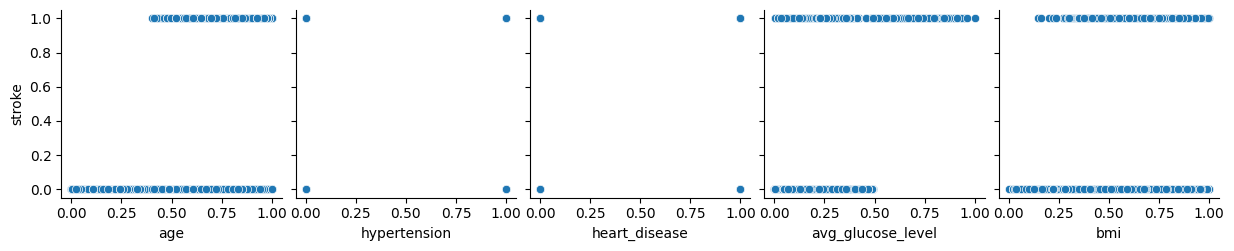

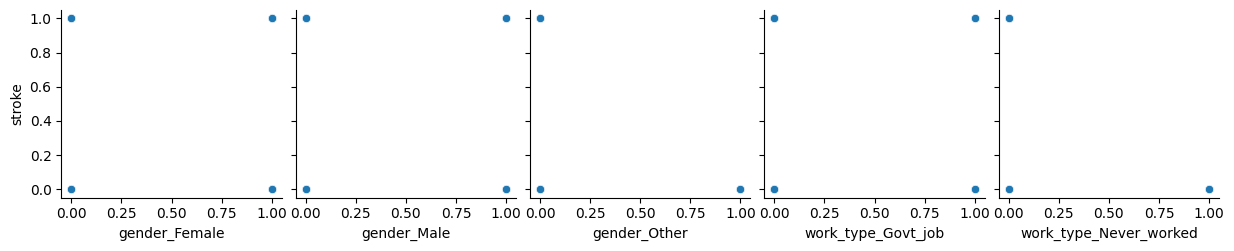

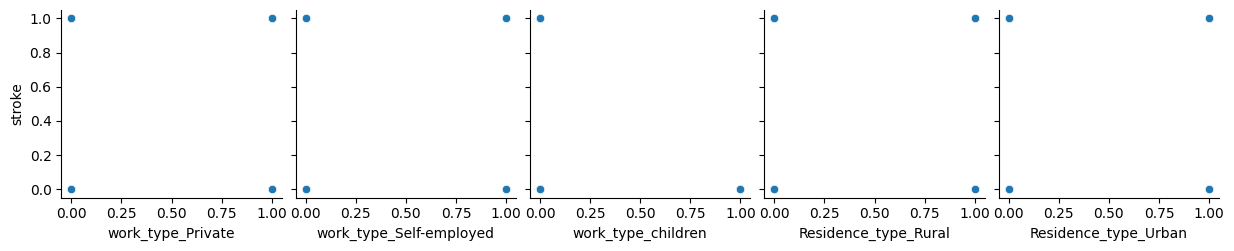

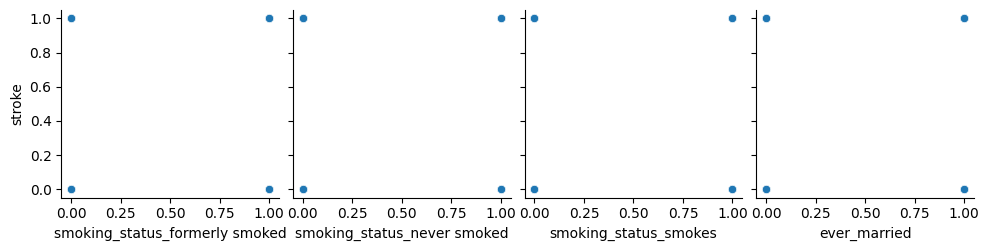

In [31]:
X = TRAIN.drop('stroke', axis=1)
y = TRAIN['stroke']


sns.pairplot(TRAIN, x_vars=X.columns[:5], y_vars='stroke')
sns.pairplot(TRAIN, x_vars=X.columns[5:10], y_vars='stroke')
sns.pairplot(TRAIN, x_vars=X.columns[10:15], y_vars='stroke')
sns.pairplot(TRAIN, x_vars=X.columns[15:], y_vars='stroke')
plt.show()

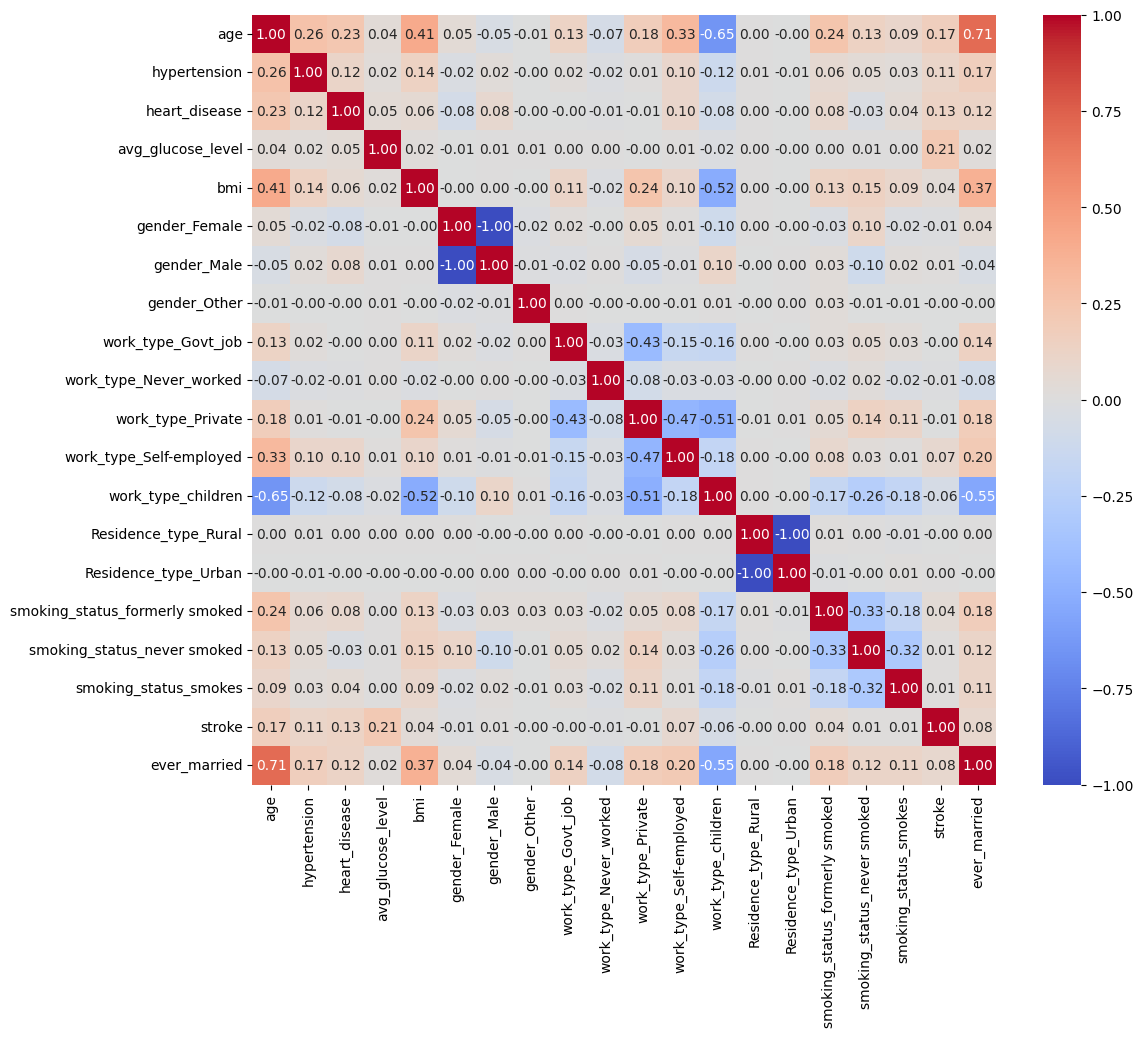

In [32]:
corr = TRAIN.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

<!-- ## Evaluatie -->

<!-- Wij hebben in deze opdracht te maken met een classificatieprobleem. Hierbij gebruiken wij de volgende metrics om te bepalen hoe goed een model presteert:


Accuracy : voorspeld het aantal correct geclassificeerde voorspellingen.

precision: Hoeveel van de fraudevoorspellingen zijn daadwekelijke fraude.

recall: hoeveel van de daadwerkelijke fraudegevallen heeft het model gevonden.

f1 : geeft een soort gemmiddelde van recall en precision. -->

In [33]:
# #hier maken wij de logistic regression aan en geven wij de uitkomsten van de metrics
# logreg = LogisticRegression(max_iter=1000)
# logreg.fit(X_train, y_train)
# # y_pred = logreg.predict(X_test)
# print(classification_report(y_test, y_pred))

In [34]:
# #aanmaken van de confusionmatrix
# cm = confusion_matrix(y_test, y_pred)
# cmd = ConfusionMatrixDisplay(cm, display_labels=['Geen Stroke', 'Stroke'])
# cmd.plot()  
# plt.show()

# #de formules om metrics te berekenen met confusionmatrix
# TN = cm[0,0]
# TP = cm[1,1]
# FN = cm[1,0]
# FP = cm[0,1]

# accuracy = ((TP + TN)/(TP + TN + FP + FN))
# precision = TP / (TP + FP) 
# recall = TP / (TP + FN) 
# f1_score= 2*precision*recall/(precision + recall)

# print('accuracy is',accuracy)
# print('precision is',precision)
# print('recall is',recall)
# print('f1-score is',f1_score)

<!-- f1-score is voor deze vraagstuk het best maatstaf doordat, Wij hebben bij deze vraagstuk te maken met een imbalanced dataset hierbij is het belangrijk dat wij de nauwkeurigheid van het model goed hebben . Wij vinden dat beide precision en recall even belangrijk zijn. Zodat wij min mogelijk false negatives hebben, want anders verliezen we iemand. En zelfde voor false positives, anders gaat het zoveel mensen zomaar bang maken en naar de hospitaal gaan, alleen om te horen dat ze geen hartaanval hebben en geld hebben verspild.  -->

<!-- ## Modeling -->

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### K-Nearest Neighbors


K-Nearest Neighbors (KNN)  is een eenvoudig, niet-parametrisch algoritme dat zowel voor classificatie als regressie wordt gebruikt. Het algoritme bepaalt de uitkomst door de afstand tussen een nieuw gegevenspunt en bestaande gegevenspunten te berekenen, waarbij de K dichtstbijzijnde buren worden gebruikt om een beslissing te nemen [Nearest neighbors. (z.d.)](https://scikit-learn.org/stable/modules/neighbors.html). KNN maakt gebruik van deze 'K' dichtstbijzijnde buren om nieuwe gegevenspunten te classificeren of voorspellingen te doen, waarbij het aantal buren dat in aanmerking wordt genomen door de gebruiker kan worden gespecificeerd [(W3Schools.com, z.d.)](https://www.w3schools.com/python/python_ml_knn.asp).

Afstand: Meestal wordt de afstand berekend met de Euclidische of Manhattan afstand, afhankelijk van de data.

- Euclidische afstand: Dit is de directe afstand tussen twee punten in een ruimte en wordt gedefinieerd door de formule:
$$
d_{\text{euclid}}(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
$$



- Manhattan afstand: Dit is de som van de absolute verschillen tussen de coördinaten van twee punten:
$$
d_{\text{manhattan}}(x, y) = \sum_{i=1}^{n} |x_i - y_i|
$$

[Singh, A. (2024, 8 oktober)](https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/)


Standaardisatie: KNN maakt gebruik van afstanden om beslissingen te nemen, dus de schaal van de features beïnvloedt de afstandsbepaling sterk. Features met grotere waardes kunnen de uitkomst domineren. Standaardisatie zorgt ervoor dat alle features op een vergelijkbare schaal worden gebracht, doorgaans met een gemiddelde van 0 en een standaarddeviatie van 1, wat voorkomt dat sommige features de afstandsberekeningen domineren [(Deep Dive On KNN: Understanding And Implementing The K-Nearest Neighbors Algorithm, 2023)](https://arize.com/blog-course/knn-algorithm-k-nearest-neighbor/).

Hyperparameters: De belangrijkste parameter is het aantal buren (k). Een lage k-waarde kan zorgen voor overfitting, terwijl een hoge k-waarde het risico op underfitting geeft [(KNN Hyperparameters: A Friendly Guide To Optimization - ProgrammingR, 2023)](https://www.programmingr.com/knn-hyperparameters-a-friendly-guide-to-optimization/).

Regularisatie: Een hogere k-waarde kan helpen om overfitting te verminderen en maakt het model minder gevoelig.

**Bronnen:**

- W3Schools.com. (z.d.). https://www.w3schools.com/python/python_ml_knn.asp

- Singh, A. (2024, 8 oktober). KNN algorithm: Introduction to K-Nearest Neighbors Algorithm for Regression. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/

- 1.6. Nearest neighbors. (z.d.). Scikit-learn. https://scikit-learn.org/stable/modules/neighbors.html

- KNN Hyperparameters: A Friendly Guide to Optimization - ProgrammingR. (2023, 19 oktober). ProgrammingR. https://www.programmingr.com/knn-hyperparameters-a-friendly-guide-to-optimization/

- Deep Dive on KNN: Understanding and Implementing the K-Nearest Neighbors Algorithm. (2023, 9 juni). Arize AI. https://arize.com/blog-course/knn-algorithm-k-nearest-neighbor/

In [36]:

#  KNN-model
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')

# Train het model op de training data
knn.fit(X_train, y_train)

# Maak voorspellingen op de test data
y_pred = knn.predict(X_test)

In [37]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Test accuracy: 0.98
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      8569
           1       0.41      0.10      0.16       146

    accuracy                           0.98      8715
   macro avg       0.70      0.55      0.58      8715
weighted avg       0.98      0.98      0.98      8715



In [ ]:
# Definieer het parameter grid voor GridSearch
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Test verschillende aantallen buren
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Test verschillende afstanden
    'weights': ['uniform', 'distance'],
}
grid_search = GridSearchCV(knn, param_grid, cv=5, verbose=1)
grid_search.fit(X_train, y_train)
print(f"Beste parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Beste parameters: {'metric': 'manhattan', 'n_neighbors': 7}


In [39]:
y_pred = grid_search.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Test accuracy: 0.98
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      8569
           1       0.67      0.04      0.08       146

    accuracy                           0.98      8715
   macro avg       0.83      0.52      0.53      8715
weighted avg       0.98      0.98      0.98      8715



### Logistic Regression

Logistic Regression is een lineair classificatiemodel dat niet alleen wordt gebruikt voor binaire classificatie. Echter, het kan ook worden uitgebreid naar multi-klasse classificatie, zoals met softmax-regressie voor meer dan twee klassen [(Furnieles (2022))](https://towardsdatascience.com/sigmoid-and-softmax-functions-in-5-minutes-f516c80ea1f9). Het belangrijkste idee achter Logistic Regression is om een lineaire beslissing te nemen en deze te transformeren naar een kans met behulp van de sigmoidfunctie [(Binary Classification With Logistic Regression Using PyTorch, 2024)](https://www.datatechnotes.com/2024/03/binary-classification-with-logistic.html#google_vignette). Deze lineaire beslissing kan worden gezien als een grens (decision boundary) die de verschillende klassen scheidt, waarbij de sigmoidfunctie helpt om deze grens om te zetten in waarschijnlijkheden.

**Lineaire decision boundary:**

De basis van Logistic Regression is het creëren van een lineaire decision boundary. De lineaire functie is als volgt:
$$
z = b + w_1 x_1 + w_2 x_2 + \cdots + w_N x_N
$$

Waarbij:

- $z:$ is de log odds.
- $b:$ is de bias of intercept.
- $w_1,w_2,...,w_N:$ de gewichten zijn die het model leert. 
- $x_1,x_2,...,x_N:$ zijn de invoerwaarden.

De lineaire uitvoer $z$ wordt vervolgens door de sigmoidfunctie gehaald om een waarschijnlijkheid te berekenen dat de invoer tot een bepaalde klasse behoort. De sigmoidfunctie wordt gedefinieerd door de formule:
$$
σ(z) = \frac{1}{1 + e^{-z}}
$$
 
Waarbij:

- $σ(z):$ Dit staat voor de sigmoidfunctie, die een inputwaarde $z$ neemt en een waarde tussen 0 en 1 retourneert.
- $e^{-z}:$ Dit is een exponentiële functie waarbij de exponent $−z$ is.
- $z:$ is de log odds
- $1 + e^{-z}:$ Dit is de noemer van de sigmoidfunctie. Door deze term te hebben, wordt de functie zo gedefinieerd dat de uitvoer altijd tussen 0 en 1 ligt.

[(Logistic Regression: Calculating A Probability With The Sigmoid Function, z.d.)](https://developers.google.com/machine-learning/crash-course/logistic-regression/sigmoid-function)

waarbij σ(z) de voorspelde kans is dat de observatie tot klasse 1 behoort. Deze kans ligt tussen 0 en 1. Als σ(z)≥0.5, wordt voorspeld dat de uitkomst tot klasse 1 behoort; anders tot klasse 0 .


[Kumar, A. (2024, 26 augustus)](https://vitalflux.com/python-train-model-logistic-regression/)

[(Wikipedia contributors, 2024b)](https://en.wikipedia.org/wiki/Sigmoid_function)

**Loss-functie:**  

De log loss, ook wel bekend als cross-entropy loss, is de meest gebruikte lossfunctie voor Logistic Regression, met name voor binaire classificatieproblemen. Deze functie speelt een cruciale rol in machine learning-modellen, omdat het de prestatie van een model beoordeelt door de voorspelde kansen te vergelijken met de werkelijke klassewaarden. Log loss straft verkeerde voorspellingen, vooral wanneer het model een hoge waarschijnlijkheid toekent aan de verkeerde klasse. Door de fout tussen de voorspelde kansen en de werkelijke labels te minimaliseren, helpt log loss het model om nauwkeurigere voorspellingen te maken [(Savage Rose Admin, 2021)](https://savagerose.org/nl/binary-cross-entropy-aka-log-loss-de-kostenfunctie-die-wordt-gebruikt-in-logistic-regression/).

De log-loss of binaire cross-entropy loss-functie wordt gedefinieerd als:

$$
L(y, \hat{y}) = -\frac{1}{N} \sum_{i=1}^{N} \left( y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right)
$$

Waarbij:
- $L(y, \hat{y})$: Dit is de verliesfunctie. Het geeft aan hoe goed het model presteert. Hoe lager de waarde, hoe beter het model de gegevens voorspelt.
- $N$: Het totale aantal voorbeelden in de dataset.
- $y_i$: De echte waarde van het $i$-de voorbeeld. Dit is 0 of 1.
- $\hat{y}_i$: De voorspelde kans dat het $i$-de voorbeeld tot klasse 1 behoort (waarde tussen 0 en 1).

**Uitleg van de termen:**
1. $-\frac{1}{N} \sum_{i=1}^{N} \left( y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right)$:
   - Dit is het gemiddelde verlies over alle $N$ voorbeelden. Het neemt de som van de individuele verliezen en deelt deze door $N$, zodat je een gemiddeld verlies hebt.

2. $y_i \log(\hat{y}_i)$:
   - Dit deel meet het verlies wanneer de werkelijke waarde $y_i$ gelijk is aan 1. In dat geval wil je dat de voorspelde kans $\hat{y}_i$ ook dicht bij 1 ligt. Als $\hat{y}_i$ groot is (dicht bij 1), zal $\log(\hat{y}_i)$ klein zijn, wat resulteert in een klein verlies. Echter, als $\hat{y}_i$ klein is (dicht bij 0), zal $\log(\hat{y}_i)$ sterk negatief zijn, wat resulteert in een groot verlies.

3. $(1 - y_i) \log(1 - \hat{y}_i)$:
   - Dit deel meet het verlies wanneer de werkelijke waarde $y_i$ gelijk is aan 0. In dat geval wil je dat de voorspelde kans $\hat{y}_i$ dicht bij 0 ligt. Als $\hat{y}_i$ klein is (dicht bij 0), zal $\log(1 - \hat{y}_i)$ groot zijn, wat resulteert in een klein verlies. Echter, als $\hat{y}_i$ dicht bij 1 ligt, zal $\log(1 - \hat{y}_i)$ sterk negatief zijn, wat resulteert in een groot verlies.

([(Megha, 2024)](https://www.analyticsvidhya.com/blog/2020/11/binary-cross-entropy-aka-log-loss-the-cost-function-used-in-logistic-regression),[(Logistic Classification With Cross-entropy (1/2), z.d.)](https://peterroelants.github.io/posts/cross-entropy-logistic/))


**Gradient descent:** Het gradient descent-algoritme wordt gebruikt om de parameters van het model te optimaliseren door de kostenfunctie te minimaliseren. De parameters worden aangepast volgens de volgende update-regel:

$$x_{new} = x_{old} - \alpha \frac{dy}{dx}$$

- $x_{new}$: De nieuwe waarde van de parameter x na één update.

- $x_{old}$: De huidige of oude waarde van de parameter x vóór de update.

- α: De learning rate of leersnelheid. 

- ${dy}/{dx}$: De gradient of helling van de functie ten opzichte van x, oftewel de afgeleide van de foutfunctie.

**Rekenvoorbeeld:**

Stel dat iemand een eenvoudige functie wil minimaliseren:
$$y(x) = (x - 3)^2$$

De persoon kiest een beginwaarde voor $x$. Stel dat de startwaarde $x_{old}= 0$ is.

De afgeleide van de functie $y(x)$ is:

$$dy/dx = 2 * (x - 3)$$


Voor $x_{old} = 0$, wordt de afgeleide:
$$dy/dx = 2 * (0 - 3) = -6$$

De persoon past de gradient descent-formule toe om de nieuwe waarde van $x$ te berekenen. Als de leersnelheid $α = 0.1$ is, wordt de nieuwe waarde van $x$ als volgt berekend:

$$x_new = x_old - α * (dy/dx)$$

Dat geeft:

$$x_new = 0 - 0.1 * (-6) = 0 + 0.6 = 0.6$$

Nu is $x_new = 0.6$. De persoon kan deze stap herhalen met deze nieuwe waarde van $x$ totdat de optimale waarde van $x$ is bereikt.




**Regularisatie:** We kunnen L1 of L2 regularisatie gebruiken om te zorgen dat de gewichten klein blijven, zodat het model niet overfit.

**L1-regularisatie (Lasso)**

- L1-regularisatie (Lasso): Voegt de absolute waarden van de gewichten toe aan de loss-functie.
$$
L_{\text{lasso}}(\beta) = L(\beta) + \lambda \sum_{j=1}^{n} |\beta_j|
$$

Waarbij:
- $L(β)$ de originele loss-functie is.
- λ de regularisatieparameter is die bepaalt hoeveel straf er wordt opgelegd voor grote gewichten.
- $\beta_j^2$ de gewichten van de kenmerken zijn.

Effecten:
- Dwingt sommige gewichten naar nul, wat kan helpen bij kenmerkselectie.
- Vermindert de complexiteit van het model, wat helpt bij het voorkomen van overfitting.
- Voorkomt dat het model te sterk past op de trainingsdata.

**L2-regularisatie (Ridge)**

- L2-regularisatie (Ridge): Voegt de kwadraten van de gewichten toe aan de loss-functie.
$$
L_{\text{ridge}}(\beta) = L(\beta) + \lambda \sum_{j=1}^{n} \beta_j^2
$$

Waarbij:
- $L(β)$ de originele loss-functie is.
- λ de regularisatieparameter is.
- $\beta_j^2$ de kwadraten van de gewichten zijn.

Effecten:
- Zorgt ervoor dat gewichten kleiner worden, maar brengt ze niet naar nul.
- Helpt bij het voorkomen van overfitting door gewichten te beperken en zo te zorgen dat het model niet te complex wordt.
- Verkleint de invloed van kenmerken die minder belangrijk zijn, zonder ze volledig te elimineren zoals bij L1.


[(A Gentle Introduction To Logistic Regression And Lasso Regularisation Using R, 2017)](https://eight2late.wordpress.com/2017/07/11/a-gentle-introduction-to-logistic-regression-and-lasso-regularisation-using-r/)


Beide technieken helpen overfitting te verminderen door de complexiteit van het model te beperken.



Regularisatie helpt bij het verminderen van overfitting door de complexiteit van het model te beperken. Het penaliseert grote gewichten, wat ervoor zorgt dat het model zich niet te veel aanpast aan de trainingsdata en beter generaliseert naar nieuwe data ([Favilla, V. (2023, 6 juni)](https://medium.com/@vincefav/regularization-in-logistic-regression-14b50d7cc31)).


Hyperparameters: Bij Logistic Regression zijn de belangrijkste hyperparameters de regularisatieparameter lambda(λ) en het type regularisatie (L1 of L2). Een cross-validation proces kan helpen om de optimale waarde voor lambda(λ) te bepalen, zodat het model goed generaliseert op de gekozen evaluatiemetric ([ChatGPT, V. (2024)](https://chatgpt.com/share/670bcdbb-4574-800e-a27d-a2292ea5c7c4))

**Bronnen:**

- Kumar, A. (2024, 26 augustus). Logistic Regression in Machine Learning: Python example. Analytics Yogi. https://vitalflux.com/python-train-model-logistic-regression/

- W3Schools.com. (z.d.-b). https://www.w3schools.com/python/python_ml_logistic_regression.asp

- Favilla, V. (2023, 6 juni). Regularization in logistic regression - Vincent Favilla - medium. Medium. https://medium.com/@vincefav/regularization-in-logistic-regression-14b50d7cc31

- Logistic classification with cross-entropy (1/2). (z.d.). https://peterroelants.github.io/posts/cross-entropy-logistic/

- Binary Classification with Logistic Regression using PyTorch. (2024, 11 maart). https://www.datatechnotes.com/2024/03/binary-classification-with-logistic.html#google_vignette

- A gentle introduction to logistic regression and lasso regularisation using R. (2017, 6 oktober). Eight To Late. https://eight2late.wordpress.com/2017/07/11/a-gentle-introduction-to-logistic-regression-and-lasso-regularisation-using-r/

- ChatGPT, 2024. Prompt 1: Hyperparameters Logistic Regression. https://chatgpt.com/share/670bcdbb-4574-800e-a27d-a2292ea5c7c4

- Megha. (2024, 10 januari). Log Loss vs. Mean Squared Error: Choosing the Right Metric for Classification. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2020/11/binary-cross-entropy-aka-log-loss-the-cost-function-used-in-logistic-regression/


- Furnieles, G. (2022, 8 september). Sigmoid and SoftMax Functions in 5 minutes - Towards Data Science. Medium. https://towardsdatascience.com/sigmoid-and-softmax-functions-in-5-minutes-f516c80ea1f9

- Logistic regression: Calculating a probability with the sigmoid function. (z.d.). Google For Developers. https://developers.google.com/machine-learning/crash-course/logistic-regression/sigmoid-function

- Wikipedia contributors. (2024b, oktober 22). Sigmoid function. Wikipedia. https://en.wikipedia.org/wiki/Sigmoid_function

- Admin. (2021, 24 november). Log Loss - Logistic Regression’s Cost Function for Beginners | Savage Rose. Savage Rose. https://savagerose.org/nl/binary-cross-entropy-aka-log-loss-de-kostenfunctie-die-wordt-gebruikt-in-logistic-regression/

In [40]:
# Logistic Regression model
log_reg = LogisticRegression(class_weight = 'balanced')

log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Test accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.79      0.88      8569
           1       0.06      0.82      0.12       146

    accuracy                           0.79      8715
   macro avg       0.53      0.80      0.50      8715
weighted avg       0.98      0.79      0.87      8715



In [ ]:
# Definieer het parameter grid voor GridSearch
param_grid = {
    "C": [0.1, 1, 10, 100],  # regularisatie parameter
    "penalty": ["l1", "l2"],  # l1 = Lasso, l2 = Ridge
    "solver": ["liblinear", "saga", "lbfgs", "newton-cg"],  # optimalisatie algoritme
    "max_iter": [100, 200, 300],  # max aantal iteraties
    "class_weight": [None, "balanced"],  # aanpassing voor ongebalanceerde klassen
}
grid = GridSearchCV(log_reg, param_grid, cv=5, verbose=1)

grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)

print(f"Beste parameters: {grid_search.best_params_}")
print(f"Beste cross-validation score: {grid_search.best_score_}")

Fitting 5 folds for each of 192 candidates, totalling 960 fits


c:\Users\Belaachir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Belaachir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Belaachir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Belaachir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Belaachir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Users\Belaac

In [48]:
# Evalueer het model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Test accuracy: 0.9869191049913941
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      8569
           1       0.97      0.23      0.37       146

    accuracy                           0.99      8715
   macro avg       0.98      0.61      0.68      8715
weighted avg       0.99      0.99      0.98      8715



In [49]:
import os  # Import the os module
def submission(model, file_name='name'):
    y_pred = model.predict(TEST[X.columns])
    copy_test = test.copy()
    copy_test['stroke'] = y_pred
    sub = copy_test[['stroke']].reset_index()

    os.makedirs('predictions', exist_ok=True)

    csv_file = f'predictions/{file_name}.csv'
    sub.to_csv(csv_file, index=False)
    print(f'Submission saved to {csv_file}')

# submission(grid, "LogisticRegression1vv")

Submission saved to predictions/LogisticRegression1vv.csv


<!-- ### SVM

**UITLEG** -->

<!-- ### Decision Tree

**UITLEG** -->

<!-- ### Ensembles

**UITLEG** -->

<!-- #### Random Forest -->

<!-- #### Gradient Boosted Decision Trees -->

<!-- #### XGBoost -->

<!-- XGBoost (eXtreme Gradient Boosting) is een krachtig machine learning-algoritme dat goed werkt voor zowel regressie als classificatie. Het combineert meerdere eenvoudige modellen (meestal beslisbomen) om samen een sterk en nauwkeurig model te vormen. XGBoost gebruikt gradient boosting om de fouten steeds verder te verkleinen door het model bij elke stap te verbeteren. Daarbij worden ook technieken toegepast om overfitting te voorkomen, zoals L1- en L2-regularisatie.

XGBoost is snel en efficiënt, kan goed omgaan met grote datasets en heeft een ingebouwde manier om ontbrekende gegevens af te handelen. Het is populair vanwege zijn snelheid, nauwkeurigheid en vermogen om ingewikkelde verbanden tussen kenmerken te verwerken.  
[(GeeksforGeeks, 2023)](https://www.geeksforgeeks.org/ml-xgboost-extreme-gradient-boosting/) -->

<!-- ### Self-assembled ensemble -->

<!-- Een Voting Classifier is een machine learning-techniek die gebruikmaakt van meerdere modellen om samen een betere en nauwkeurigere voorspelling te maken. Dit is een vorm van ensemble learning, waarbij verschillende basismodellen worden gecombineerd om de prestaties van een model te verbeteren. Het idee hierachter is dat door de voorspellingen van verschillende modellen te combineren, we de bias en variatie kunnen verkleinen en zo de nauwkeurigheid kunnen vergroten.

Er zijn twee soorten voting classifiers:
- Hard Voting: Hierbij wordt de klasse gekozen die het vaakst door de individuele modellen wordt voorspeld. De klasse met de meeste stemmen wordt de uiteindelijke voorspelling.  
- Soft Voting: Hierbij worden de waarschijnlijkheden van elke klasse door de modellen gemiddeld. De klasse met de hoogste gemiddelde waarschijnlijkheid wordt dan als eindvoorspelling gekozen.

In plaats van elk model apart te evalueren, gebruikt de Voting Classifier de gecombineerde kracht van meerdere modellen om een robuustere voorspelling te maken.  
[(GeeksforGeeks, 2023a)](https://www.geeksforgeeks.org/voting-classifier/) -->

<!-- ## Results

|Model|f1-score|kaggle score|
|-----|--------|------------|
||||
||||
||||
||||
|||| -->

In [44]:
def submission(model, file_name='submission'):
    '''Makes prediction on the test data and makes a csv containing the id and predictions.
    This is used to make a csv file to submit in the kaggle competition.

    Parameters:
        model: the trained model.
        file_name (str): name of the csv file. On default: 'submission'
    '''
    y_pred = model.predict(TEST)
    copy_test = TEST.copy()
    copy_test['stroke'] = y_pred
    sub = copy_test[['stroke']].reset_index()

    os.makedirs('predictions', exist_ok=True)

    csv_file = f'predictions/{file_name}.csv'
    sub.to_csv(csv_file, index=False)
    print(f'Submission saved to {csv_file}')

In [45]:
# submission(log_reg, 'log_reg')

<!-- ## Conclusion & Advice -->

<!-- ## Sources -->

<!-- [GeeksforGeeks, 2023](https://www.geeksforgeeks.org/ml-xgboost-extreme-gradient-boosting/)  
[GeeksforGeeks, 2023a](https://www.geeksforgeeks.org/voting-classifier/) -->

<!--  -->